<a href="https://colab.research.google.com/github/andyko208/Music_Selector/blob/main/Music_Selector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os    
import pickle as pkl
import librosa
import json
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

HOME_DIR = '/content/drive/MyDrive/Music_Selector/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Steps to complete the process
1. preprocess_data()
   - Use whole length of music as training data (length of 1 min song will have 3 vectors as output)
   - Compute mfcc of each wav file
   - Include a label for each music data vector, 0: Chills, 1: Hypes, 2: Trips
   - Transpose mfcc matrix when putting to my_dict to fit to the CNN model
   - Include all of output vectors in one JSON file

2. check_data()
   - Load a JSON file which contains all output vectors
   - View a few mfcc spectogram of from list of files

3. load_data()
   - Load data for Training/Test

In [ ]:
def preprocess_data(Training_or_Test):

  training_or_test_dir = os.path.join(HOME_DIR, Training_or_Test)
  
  # What json file will contain, MFCC of each .wav data and labels of each
  mydict = {
        "labels": [],
        "mfccs": []
  }

  # music_type = Chills, Hypes, Trips
  for music_type in os.listdir(training_or_test_dir):

    # music_type_dir = '/content/drive/MyDrive/Music_Selector/Training/Chills'
    music_type_dir = os.path.join(training_or_test_dir, music_type)
    
    # Number of music vectors created from music_type_dir
    total_num_data_files = 0
    
    # checking if it is a directory
    if os.path.isdir(music_type_dir):
      # music = chill_1.wav
      for music in os.listdir(music_type_dir):

        # music_file = '/content/drive/MyDrive/Music_Selector/Training/Chills/chill_1.wav'
        music_file = os.path.join(music_type_dir, music)

        if music_file.find('Chills') > -1:
          label = 0
        elif music_file.find('Hypes') > -1:
          label = 1
        elif music_file.find('Trips') > -1:
          label = 2
        
        # Number of music vectors created from music_file
        num_data_files = 0

        # checking if it is a file
        if os.path.isfile(music_file):
          print('Processing: ' + music, end='')
          music_samples, sr = librosa.load(music_file)
          
          # Have each music data vector have same length (20seconds of music data)
          partial_samples = 20 * sr
          
          # increment by 20 seconds of music each time
          for curr_sample in range(0, len(music_samples)-partial_samples, partial_samples):
            mfcc = librosa.feature.mfcc(music_samples[curr_sample:curr_sample+partial_samples], sr=sr)
            num_data_files+=1
            total_num_data_files+=1

            mydict["labels"].append(label)
            mydict["mfccs"].append(mfcc.T.tolist())
            
          print(' --- {} music data vectors are created.'.format(num_data_files))
      print('--- Total of {} music data vectors are created for the music type: {}(0: Chills, 1: Hypes, 2: Trips) ---'.format(total_num_data_files, label))
    
    # Write the dictionary in a json file.
    json_path = os.path.join(training_or_test_dir, Training_or_Test + '_data.json')
    with open(json_path, 'w') as f:
        json.dump(mydict, f)
    f.close()

In [ ]:
def check_data(Training_or_Test):  
  json_path = Training_or_Test + '_' + 'data.json'
  json_path = os.path.join(HOME_DIR, Training_or_Test, json_path)
  f = open(json_path)
  # returns JSON object as a dictionary
  data = json.load(f)
  print('{} mfcc vectors with shape {}.'.format(len(data['mfccs']), np.array(data['mfccs'][0]).shape))
  for i in range(0, len(data['labels']), int(len(data['labels'])/3)):
    plt.figure()
    librosa.display.specshow(np.array(data['mfccs'][i]).T, sr=22050, x_axis='time')
  f.close()

In [ ]:
def load_data(Training_or_Test):  
  json_path = Training_or_Test + '_' + 'data.json'
  json_path = os.path.join(HOME_DIR, Training_or_Test, json_path)
  f = open(json_path)
  # returns JSON object as a dictionary
  data = json.load(f)
  f.close()

  x = np.array(data["mfccs"])
  y = np.array(data["labels"])

  return x,y

## Create Training Data
##### 1. Goes through raw wav data from Music_Selector_Training directory
##### 2. Get mffc training vectors from files of each directory
##### 3. Hold all of them in a JSON file






In [ ]:
preprocess_data('Training')

Processing: chill_1.wav --- 8 music data vectors are created.
Processing: chill_2.wav --- 11 music data vectors are created.
Processing: chill_3.wav --- 11 music data vectors are created.
Processing: chill_4.wav --- 10 music data vectors are created.
Processing: chill_5.wav --- 7 music data vectors are created.
Processing: chill_6.wav --- 8 music data vectors are created.
Processing: chill_8.wav --- 10 music data vectors are created.
Processing: chill_9.wav --- 10 music data vectors are created.
Processing: chill_10.wav --- 11 music data vectors are created.
Processing: chill_7.wav --- 11 music data vectors are created.
--- Total of 97 music data vectors are created for the music type: 0(0: Chills, 1: Hypes, 2: Trips) ---
Processing: hype_1.wav --- 9 music data vectors are created.
Processing: hype_2.wav --- 10 music data vectors are created.
Processing: hype_8.wav --- 10 music data vectors are created.
Processing: hype_3.wav --- 11 music data vectors are created.
Processing: hype_9.wa

292 mfcc vectors with shape (862, 20).


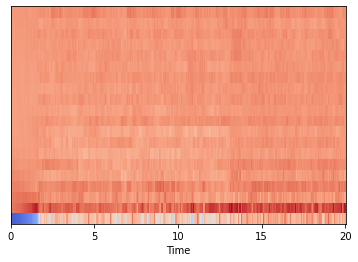

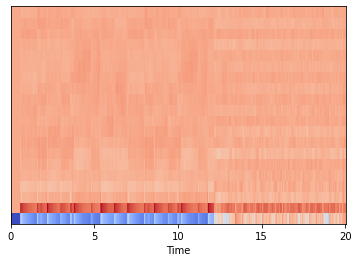

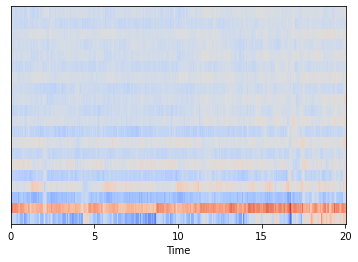

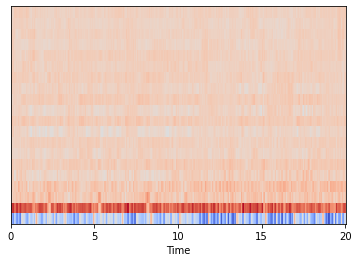

In [ ]:
check_data('Training')

## Create Test Data
##### 1. Goes through raw wav data from Music_Selector_Training directory
##### 2. Get mffc training vectors from files of each directory
##### 3. Hold all of them in a JSON file








In [ ]:
preprocess_data('Test')

Processing: chill_2.wav --- 13 music data vectors are created.
Processing: chill_3.wav --- 9 music data vectors are created.
Processing: chill_4.wav --- 8 music data vectors are created.
Processing: chill_1.wav --- 8 music data vectors are created.
Processing: chill_5.wav --- 10 music data vectors are created.
--- Total of 48 music data vectors are created for the music type: 0(0: Chills, 1: Hypes, 2: Trips) ---
Processing: hype_1.wav --- 9 music data vectors are created.
Processing: hype_3.wav --- 9 music data vectors are created.
Processing: hype_2.wav --- 10 music data vectors are created.
Processing: hype_4.wav --- 8 music data vectors are created.
Processing: hype_5.wav --- 7 music data vectors are created.
--- Total of 43 music data vectors are created for the music type: 1(0: Chills, 1: Hypes, 2: Trips) ---
Processing: trip_1.wav --- 5 music data vectors are created.
Processing: trip_2.wav --- 11 music data vectors are created.
Processing: trip_3.wav --- 12 music data vectors ar

142 mfcc vectors with shape (862, 20).


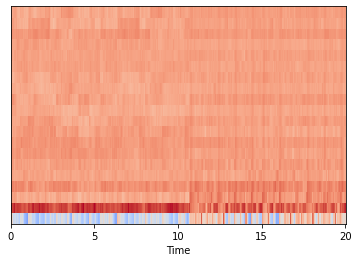

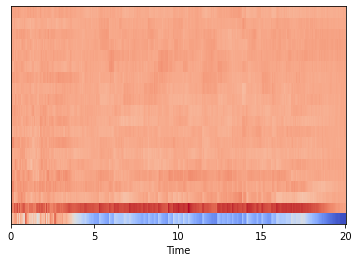

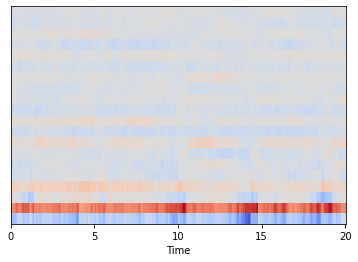

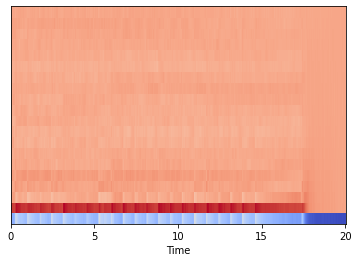

In [ ]:
check_data('Test')

## Prepare Data
##### 1. Pull both JSON files out to utilize them in a prediction model
##### 2. Split into train/test/vals





In [ ]:
train_x, train_y = load_data('Training')
print('train_x: ' + str(train_x.shape))
print('train_y: ' + str(train_y.shape))
test_x, test_y = load_data('Test')
print('test_x: ' + str(test_x.shape))
print('test_y: ' + str(test_y.shape))

train_x: (292, 862, 20)
train_y: (292,)
test_x: (142, 862, 20)
test_y: (142,)


In [ ]:
from sklearn.model_selection import train_test_split

def prepare_datasets(inputs, targets, split_size):
    
    # Creating a validation set and a test set.
    inputs_train, inputs_val, targets_train, targets_val = train_test_split(inputs, targets, test_size=split_size)
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs_train, targets_train, test_size=split_size)
    
    # Our CNN model expects 3D input shape.
    inputs_train = inputs_train[..., np.newaxis]
    inputs_val = inputs_val[..., np.newaxis]
    inputs_test = inputs_test[..., np.newaxis]
    
    return inputs_train, inputs_val, inputs_test, targets_train, targets_val, targets_test

In [ ]:
Xtrain, Xval, Xtest, ytrain, yval, ytest = prepare_datasets(train_x, train_y, 0.2)

## Build Model
Reference: https://github.com/msaintfelix/TensorFlow_MusicGenre_Classifier

In [ ]:
def design_model(input_shape):

    # Let's design the model architecture.
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        
        tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
        tf.keras.layers.MaxPooling2D((3,3), strides=(2,2), padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'), 
        tf.keras.layers.Dense(10, activation='softmax')
        # len(np.unique(targets)), 
    ])

    return model
input_shape = (Xtrain.shape[1], Xtrain.shape[2], 1)
print(input_shape)
model = design_model(input_shape)
model.summary()

(862, 20, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 860, 18, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 430, 9, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 430, 9, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 428, 7, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 214, 4, 32)       0         
 2D)                                                             
                                           

In [ ]:
def plot_performance(hist):
    
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

In [ ]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics = ['acc']
                     )

Epoch 1/50
12/12 [==============================] - 10s 62ms/step - loss: 2.0942 - acc: 0.5430 - val_loss: 4.5174 - val_acc: 0.3729
Epoch 2/50
12/12 [==============================] - 0s 11ms/step - loss: 0.4514 - acc: 0.8495 - val_loss: 2.6626 - val_acc: 0.4576
Epoch 3/50
12/12 [==============================] - 0s 11ms/step - loss: 0.1913 - acc: 0.9409 - val_loss: 3.7778 - val_acc: 0.4915
Epoch 4/50
12/12 [==============================] - 0s 11ms/step - loss: 0.1009 - acc: 0.9731 - val_loss: 2.6555 - val_acc: 0.4576
Epoch 5/50
12/12 [==============================] - 0s 11ms/step - loss: 0.1112 - acc: 0.9570 - val_loss: 4.1279 - val_acc: 0.3559
Epoch 6/50
12/12 [==============================] - 0s 12ms/step - loss: 0.0983 - acc: 0.9677 - val_loss: 3.5934 - val_acc: 0.4746
Epoch 7/50
12/12 [==============================] - 0s 12ms/step - loss: 0.2046 - acc: 0.9839 - val_loss: 1.1614 - val_acc: 0.6610
Epoch 8/50
12/12 [==============================] - 0s 11ms/step - loss: 0.0814 - 

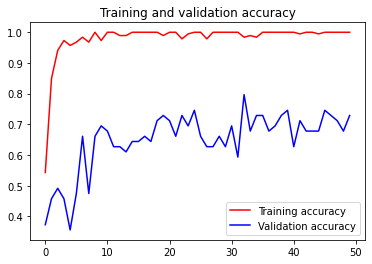

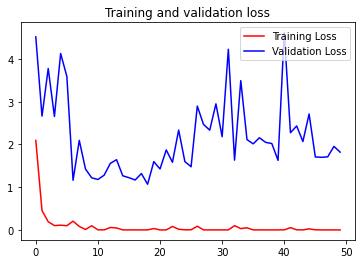

In [ ]:
# Training the model.
history = model.fit(Xtrain, ytrain,
                      validation_data=(Xval, yval),
                      epochs=50,
                      batch_size=16
                      )

plot_performance(history)

In [ ]:
def make_prediction(model, X, y, idx):
    
  genre_dict = {
      0 : "Chills",
      1 : "Hypes",
      2 : "Trips",
  }
        
  predictions = model.predict(X)
  genre = np.argmax(predictions[idx])
  
  print("\n---Now testing the model for one audio file---\nThe model predicts: {}, and ground truth is: {}.\n".format(genre_dict[genre], genre_dict[y[idx]]))
  if genre_dict[genre] == genre_dict[y[idx]]:
    return 1;
  return 0;

# Testing the model on never seen before data.
nums_correct = 0
for i in range(10):
  nums_correct += make_prediction(model, Xtest, ytest, i)
print("\n--- Out of 10 tries, model predicted {} times correctly.---\n".format(nums_correct))

2/2 [==============================] - 0s 7ms/step

---Now testing the model for one audio file---
The model predicts: Trips, and ground truth is: Trips.

2/2 [==============================] - 0s 6ms/step

---Now testing the model for one audio file---
The model predicts: Chills, and ground truth is: Chills.

2/2 [==============================] - 0s 6ms/step

---Now testing the model for one audio file---
The model predicts: Trips, and ground truth is: Trips.

2/2 [==============================] - 0s 6ms/step

---Now testing the model for one audio file---
The model predicts: Trips, and ground truth is: Trips.

2/2 [==============================] - 0s 6ms/step

---Now testing the model for one audio file---
The model predicts: Hypes, and ground truth is: Hypes.

2/2 [==============================] - 0s 6ms/step

---Now testing the model for one audio file---
The model predicts: Trips, and ground truth is: Trips.

2/2 [==============================] - 0s 6ms/step

---Now testing t